In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

Базовый анализ

In [2]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

train

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,4543,matematika,Репетитор по математике Пинчук Всеволод Роман...,"['Школьная программа', 'Математический анализ'...",4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",16.666667
4544,4544,informatika,Репетитор по информатике Травникова Ирина Нико...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",...,Школьный преподаватель,30 лет,NaN,NaN,NaN,NaN,NaN,NaN,['Школьники с 5 по 9 класс'],33.333333
4545,4545,informatika,Репетитор по информатике Савельева Екатерина Ю...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",...,Студент,6 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
4546,4546,informatika,Репетитор по информатике Сардарян Артур Роберт...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",...,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",9.722222


In [5]:
###########################################################################################################################################################################################

In [3]:
# удаляем лишнее
train.drop(['Unnamed: 0', 'ФИО'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'ФИО'], axis=1, inplace=True)

In [7]:
train.columns

Index(['предмет', 'tutor_head_tags', 'tutor_rating', 'tutor_reviews',
       'description', 'experience_desc', 'Education_1', 'Desc_Education_1',
       'Education_2', 'Desc_Education_2', 'Education_3', 'Desc_Education_3',
       'Education_4', 'Desc_Education_4', 'Ученая степень 1',
       'Ученое звание 1', 'status', 'experience', 'Desc_Education_5',
       'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2',
       'Ученое звание 2', 'categories', 'mean_price'],
      dtype='object')

In [8]:
train.isnull().mean() * 100

,0
предмет,0.000000
tutor_head_tags,0.000000
tutor_rating,12.950748
tutor_reviews,0.000000
description,0.021988
experience_desc,52.264732
Education_1,0.000000
Desc_Education_1,1.671064
Education_2,82.827617
Desc_Education_2,82.915567


**предмет**

In [9]:
train['предмет'].value_counts()

,count
предмет,
matematika,3685
informatika,863


In [4]:
# 1 #
le = LabelEncoder()

train['предмет'] = le.fit_transform(train['предмет'])
test['предмет'] = le.fit_transform(test['предмет'])

In [11]:
# 2 #
ohe = OneHotEncoder()

encoded = ohe.fit_transform(train[['предмет']].values.reshape(-1, 1)).toarray()
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['предмет']))
train = pd.concat([train, encoded_df], axis=1)

encoded = ohe.fit_transform(test[['предмет']].values.reshape(-1, 1)).toarray()
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['предмет']))
test = pd.concat([test, encoded_df], axis=1)

train.drop(['предмет'], axis=1, inplace=True)
test.drop(['предмет'], axis=1, inplace=True)

**tutor_head_tags**

In [5]:
# Парсинг строки в массив
s = train['tutor_head_tags'].value_counts()
tags = []
for val in s.index:
  val = [x.strip().replace("'", '') for x in val[1:-1].split(',')]
  for i in val:
    if i not in tags:
      tags.append(i)

print(tags)
print(len(tags))

['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ', 'Подготовка к олимпиадам', 'Математический анализ', 'Линейная алгебра', 'Аналитическая геометрия', 'Дифференциальные уравнения', 'Теория вероятности и мат. статистика', 'Elementary Mathematics in English', 'Higher Mathematics in English - высшая математика на английском языке', 'GMAT (математическая часть)', 'SAT (математическая часть)', 'A-level', 'Математическая логика', '', 'ТФКП', 'Дискретная математика', 'Уравнения мат физики', 'Mathematik auf Deutsch']
20


In [6]:
# 1 #
for col in tags:
  for index, row in train.iterrows():
      if row['tutor_head_tags'] is not np.nan:
        if col in row['tutor_head_tags']:
          train.at[index, col] = 1
        else:
          train.at[index, col] = 0

for col in tags:
  for index, row in test.iterrows():
      if row['tutor_head_tags'] is not np.nan:
        if col in row['tutor_head_tags']:
          test.at[index, col] = 1
        else:
          test.at[index, col] = 0

train

,предмет,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,...,Higher Mathematics in English - высшая математика на английском языке,GMAT (математическая часть),SAT (математическая часть),A-level,Математическая логика,,ТФКП,Дискретная математика,Уравнения мат физики,Mathematik auf Deutsch
0,1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1,"['Школьная программа', 'Математический анализ'...",4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4544,0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4545,0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4546,0,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
# 2 # ...

In [7]:
train.drop(['tutor_head_tags'], axis=1, inplace=True)
test.drop(['tutor_head_tags'], axis=1, inplace=True)

**Ученая степень 1**

In [8]:
# 1 # возможно другие веса ? [0, 100, 200]
def f1(row):
    if row['Ученая степень 1'] is np.nan:
        return 0
    elif 'кандидат' in row['Ученая степень 1'].lower():
        return 1
    elif 'доктор' in row['Ученая степень 1'].lower():
        return 2

train['Ученая степень 1'] = train.apply(f1, axis=1)
test['Ученая степень 1'] = test.apply(f1, axis=1)

In [17]:
# 2 #
def f2_1(row):
    if row['Ученая степень 1'] is not np.nan:
      if 'кандидат' in row['Ученая степень 1'].lower():
        return 1
      else:
        return 0

def f2_2(row):
    if row['Ученая степень 1'] is not np.nan:
      if 'доктор' in row['Ученая степень 1'].lower():
        return 1
      else:
        return 0

train['кандидат'] = train.apply(f2_1, axis=1)
train['доктор'] = train.apply(f2_2, axis=1)

test['кандидат'] = test.apply(f2_1, axis=1)
test['доктор'] = test.apply(f2_2, axis=1)

train.drop(['Ученая степень 1'], axis=1, inplace=True)
test.drop(['Ученая степень 1'], axis=1, inplace=True)


AttributeError: 'float' object has no attribute 'lower'

**Ученое звание 1**

In [9]:
# 1 # возможно другие веса ? [0, 100, 200]
def f1(row):
    if row['Ученое звание 1'] is np.nan:
        return 0
    elif 'доцент' in row['Ученое звание 1'].lower():
        return 1
    elif 'старший научный сотрудник' in row['Ученое звание 1'].lower():
        return 2
    elif 'профессор' in row['Ученое звание 1'].lower():
        return 3

train['Ученое звание 1'] = train.apply(f1, axis=1)
test['Ученое звание 1'] = test.apply(f1, axis=1)

In [ ]:
# 2 #
def f2_1(row):
  if row['Ученое звание 1'] is not np.nan:
    if 'доцент' in row['Ученое звание 1'].lower():
        return 1
    else:
        return 0

def f2_2(row):
  if row['Ученое звание 1'] is not np.nan:
    if 'старший научный сотрудник' in row['Ученое звание 1'].lower():
        return 1
    else:
        return 0

def f2_3(row):
  if row['Ученое звание 1'] is not np.nan:
    if 'профессор' in row['Ученое звание 1'].lower():
        return 1
    else:
        return 0

train['доцент'] = train.apply(f2_1, axis=1)
train['старший научный сотрудник'] = train.apply(f2_2, axis=1)
train['профессор'] = train.apply(f2_3, axis=1)

test['доцент'] = test.apply(f2_1, axis=1)
test['старший научный сотрудник'] = test.apply(f2_2, axis=1)
test['профессор'] = test.apply(f2_3, axis=1)

train.drop(['Ученое звание 1'], axis=1, inplace=True)
test.drop(['Ученое звание 1'], axis=1, inplace=True)

**Ученая степень 2, Ученое звание 2**

In [10]:
train['Ученая степень 2'].value_counts()

,count
Ученая степень 2,
,1


In [11]:
# удаляем #
train.drop(['Ученая степень 2', 'Ученое звание 2'], axis=1, inplace=True)
test.drop(['Ученая степень 2','Ученое звание 2'], axis=1, inplace=True)

**status**

In [ ]:
train['status'].value_counts()

In [12]:
# Парсинг строки
s = train['status'].value_counts()
tags = []
for val in s.index:
  val = [x.strip() for x in val.split(',')]
  for i in val:
    if i not in tags:
      tags.append(i)

print(tags)

#for tag in tags:
  #train[tag] = 0

['Частный преподаватель', 'Студент', 'Школьный преподаватель', 'Университетский преподаватель', 'Аспирант или ординатор очной формы обучения']


In [13]:
for col in tags:
  for index, row in train.iterrows():
      if row['status'] is not np.nan:
        if col in row['status']:
          train.at[index, col] = 1
        else:
          train.at[index, col] = 0

for col in tags:
  for index, row in test.iterrows():
      if row['status'] is not np.nan:
        if col in row['status']:
          test.at[index, col] = 1
        else:
          test.at[index, col] = 0

train

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,...,,ТФКП,Дискретная математика,Уравнения мат физики,Mathematik auf Deutsch,Частный преподаватель,Студент,Школьный преподаватель,Университетский преподаватель,Аспирант или ординатор очной формы обучения
0,1,5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1,4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4544,0,0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4545,0,0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4546,0,0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
train.drop(['status'], axis=1, inplace=True)
test.drop(['status'], axis=1, inplace=True)

**categories**

In [15]:
train['categories'].value_counts()

,count
categories,
"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']",1256
['Школьники с 5 по 9 класс'],604
"['Школьники с 1 по 4 класс', 'Школьники с 5 по 9 класс']",360
"['Школьники с 1 по 4 класс', 'Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']",307
"['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты', 'Студенты университетов', 'Взрослые кроме абитуриентов и студентов']",300
...,...
"['Дошкольники', 'Дошкольники', 'Дошкольники']",1
"['Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты', 'Студенты университетов', 'Студенты университетов', 'Студенты университетов']",1
"['Школьники с 1 по 4 класс', 'Школьники с 1 по 4 класс в паре', 'Школьники с 5 по 9 класс', 'Школьники с 5 по 9 класс в паре', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре', 'Студенты университетов', 'Студенты университетов в паре', 'Взрослые кроме абитуриентов и студентов', 'Взрослые кроме абитуриентов и студентов в паре']",1


In [16]:
# Парсинг строки в массив
s = train['categories'].value_counts()
tags = []
for val in s.index:
  val = [x.strip().replace("'", '') for x in val[1:-1].split(',')]
  for i in val:
    if i not in tags:
      tags.append(i)

tags = sorted(tags)

for i in tags:
  print(i)

Взрослые кроме абитуриентов и студентов
Взрослые кроме абитуриентов и студентов в паре
Взрослые кроме абитуриентов и студентов группа
Дошкольники
Дошкольники в паре
Дошкольники группа
Студенты университетов
Студенты университетов в паре
Школьники с 1 по 4 класс
Школьники с 1 по 4 класс в паре
Школьники с 1 по 4 класс группа
Школьники с 10 по 11 класс
Школьники с 5 по 9 класс
Школьники с 5 по 9 класс в паре
Школьники с 5 по 9 класс группа
абитуриенты
абитуриенты в паре
абитуриенты группа
студенты колледжей и техникумов


In [17]:
def f(a):
  return 1 if a > 0 else 0

In [18]:
# 1 #
# индивидуально - пара - группа
cols = ['индивидуально', 'пара', 'группа']
weights = {'индивидуально': 3, 'пара': 2, 'группа': 1} # ?
for index, row in train.iterrows():
  a, b = row['categories'].count('пар'), row['categories'].count('группа') # колво, сколько занятий в паре и группе
  train.at[index, 'пара'] = a
  #train.at[index, 'пара'] = f(a) # есть ли такие категории
  train.at[index, 'группа'] = b
  #train.at[index, 'пара'] = f(b) # есть ли такие категории
  train.at[index, 'индивидуально'] = (len(row['categories'].split(',')) - a - b) # всё - пара - группа
  #train.at[index, 'индивидуально'] = f(len(row['categories'].split(',')) - a - b) # всё - пара - группа

for index, row in test.iterrows():
  a, b = row['categories'].count('пар'), row['categories'].count('группа') # колво, сколько занятий в паре и группе
  test.at[index, 'пара'] = a
  #train.at[index, 'пара'] = f(a) # есть ли такие категории
  test.at[index, 'группа'] = b
  #train.at[index, 'пара'] = f(b) # есть ли такие категории
  test.at[index, 'индивидуально'] = len(row['categories'].split(',')) - a - b # всё - пара - группа
  #train.at[index, 'индивидуально'] = f(len(row['categories'].split(',')) - a - b) # всё - пара - группа
train

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,...,Уравнения мат физики,Mathematik auf Deutsch,Частный преподаватель,Студент,Школьный преподаватель,Университетский преподаватель,Аспирант или ординатор очной формы обучения,пара,группа,индивидуально
0,1,5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
1,1,4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
2,0,0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
3,1,4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1,0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1,4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4544,0,0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4545,0,0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
4546,0,0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [19]:
# 2 #
# Взрослые кроме абитуриентов и студентов
# Студенты университетов - абитуриенты - студенты колледжей и техникумов
#Дошкольники - Школьники с 1 по 4 - Школьники с 5 по 9 класс - Школьники с 10 по 11 класс
cols = ['Дошкольники', 'Школьники с 1 по 4', 'Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс',
        'абитуриенты', 'студенты колледжей и техникумов', 'Студенты университетов', 'Взрослые кроме абитуриентов и студентов']
for col in cols:
  for index, row in train.iterrows():
    train.at[index, col] = row['categories'].count(col) # колво, сколько категорий под возраст походит
    #train.at[index, col] = f(row['categories'].count(col)) # есть ли такие категории

for col in cols:
  for index, row in test.iterrows():
    test.at[index, col] = row['categories'].count(col)
    #train.at[index, col] = f(row['categories'].count(col))
train

,предмет,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,...,группа,индивидуально,Дошкольники,Школьники с 1 по 4,Школьники с 5 по 9 класс,Школьники с 10 по 11 класс,абитуриенты,студенты колледжей и техникумов,Студенты университетов,Взрослые кроме абитуриентов и студентов
0,1,5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,NaN,...,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
1,1,4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",NaN,...,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0,0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",Российская таможенная академия,...,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,1,4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,NaN,...,0.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1,0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,NaN,...,0.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,1,4.0,11,Закончил ННГУ им. Николая Лобачевского...,NaN,Нижегородский государственный университет им....,"Год окончания: 2020, Факультет: физический фа...",NaN,NaN,NaN,...,0.0,6.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4544,0,0.0,0,"Я, Травникова Ирина Николаевна, препод...",Учитель информатики в школ...,Таганрогский радиотехнический институт им.В.Д...,"Год окончания: 1979, Факультет: Факультет авт...",NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4545,0,0.0,0,Готовлю учеников старших классов к сда...,Репетитор не предоставил информаци...,Московский Политехнический Университет,"Год окончания: 2020, Факультет: Информационны...",NaN,NaN,NaN,...,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4546,0,0.0,0,"Выпускник медалист, студент РТУ МИРЭА,...",– полгода Изна...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Институт инфо...",NaN,NaN,NaN,...,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
# 3 # веса
cols = ['Дошкольники', 'Школьники с 1 по 4', 'Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс',
        'абитуриенты', 'студенты колледжей и техникумов', 'Студенты университетов', 'Взрослые кроме абитуриентов и студентов']
weights = {
    'Дошкольники': 1.0,
    'Школьники с 1 по 4': 1.2,
    'Школьники с 5 по 9 класс': 1.5,
    'Школьники с 10 по 11 класс': 1.8,
    'абитуриенты': 2.0,
    'студенты колледжей и техникумов': 1.7,
    'Студенты университетов': 1.9,
    'Взрослые кроме абитуриентов и студентов': 2.1
}
for col in cols:
  for index, row in train.iterrows():
    train.at[index, col] = row['categories'].count(col) * weights[col] # колво, сколько категорий под возраст походит
    #train.at[index, col] = f(row['categories'].count(col)) * weights[col] # есть ли такие категории
for col in cols:
  for index, row in test.iterrows():
    test.at[index, col] = row['categories'].count(col) * weights[col] # колво, сколько категорий под возраст походит
    #train.at[index, col] = f(row['categories'].count(col)) * weights[col] # есть ли такие категории

train

In [20]:
train.drop(['categories'], axis=1, inplace=True)
test.drop(['categories'], axis=1, inplace=True)

**description, experience_desc**

In [21]:
train['description_simbols'] = train['description'].str.len()
train['description_words'] = train['description'].str.split().str.len()
train['description_words'] = train['description'].str.split('.').str.len()

In [22]:
cols = ['description_simbols', 'description_words', 'description_words']

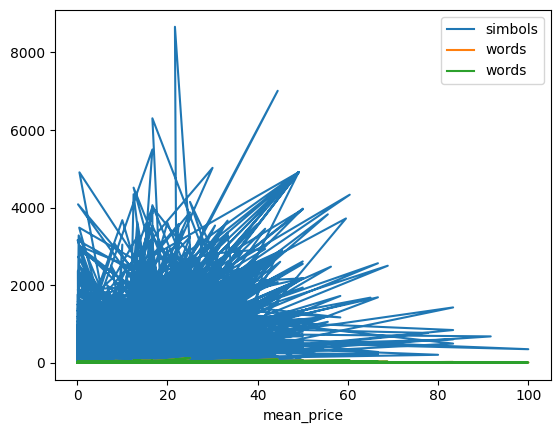

In [23]:
for col in cols:
  plt.plot(train['mean_price'], train[col], label=col.split('_')[1])
  plt.xlabel(col)
  plt.xlabel('mean_price')
  plt.legend()

In [ ]:
###########################################################################################################################################################################################

In [24]:
train['Education_1'].unique().size

1312

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 59 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   предмет                                                                4548 non-null   int64  
 1   tutor_rating                                                           3959 non-null   float64
 2   tutor_reviews                                                          4548 non-null   int64  
 3   description                                                            4547 non-null   object 
 4   experience_desc                                                        2171 non-null   object 
 5   Education_1                                                            4548 non-null   object 
 6   Desc_Education_1                                                       4472 non-null   o

In [33]:
train.describe()

,предмет,tutor_rating,tutor_reviews,Ученое звание 1,mean_price,Школьная программа,Подготовка к ЕГЭ,Подготовка к ОГЭ,Подготовка к олимпиадам,Математический анализ,...,группа,индивидуально,Дошкольники,Школьники с 1 по 4,Школьники с 5 по 9 класс,Школьники с 10 по 11 класс,абитуриенты,студенты колледжей и техникумов,Студенты университетов,Взрослые кроме абитуриентов и студентов
count,4548.000000,3959.000000,4548.000000,4547.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,...,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.810246,1.895933,2.989006,0.010556,16.197949,0.930739,0.645778,0.838391,0.148197,0.083333,...,0.046394,4.235928,0.097845,0.333113,1.089490,0.851803,0.851803,0.851803,0.181398,0.150176
std,0.392149,2.280103,8.516939,0.132236,10.485108,0.253926,0.478329,0.368133,0.355334,0.276416,...,0.282629,2.372588,0.315099,0.521441,0.577904,0.756776,0.756776,0.756776,0.398851,0.374709
min,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,4.000000,2.000000,0.000000,20.888889,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,5.000000,152.000000,3.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,24.000000,5.000000,6.000000,6.000000,7.000000,7.000000,7.000000,3.000000,4.000000


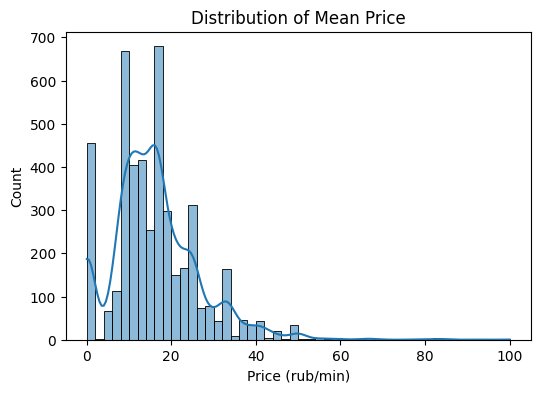

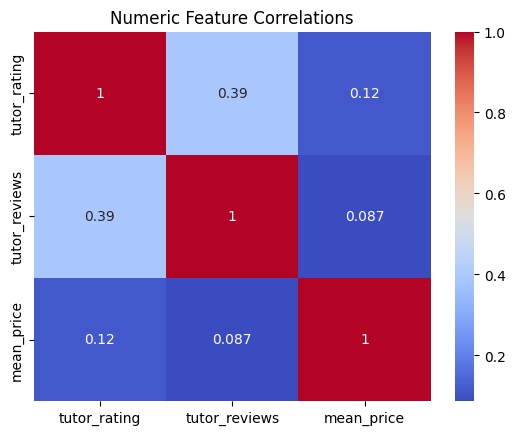

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(train['mean_price'], bins=50, kde=True)
plt.title('Distribution of Mean Price')
plt.xlabel('Price (rub/min)')
plt.show()

numeric_cols = ['tutor_rating', 'tutor_reviews']
corr = train[numeric_cols + ['mean_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()

In [26]:
def handle_na(df):
  na = df.isna().sum() / df.isna().count()

  for col in df.columns:
    if na[col] > 0.6:
      df.drop(col, axis=1, inplace=True)
    else:
      if df[col].dtype in ['categorial', 'object']:
        df[col].fillna(df[col].mode()[0], inplace=True)
      else:
        df[col].fillna(df[col].mean(), inplace=True)

In [27]:
def handle_na_missing(df):
  na = df.isna().sum() / df.isna().count()

  for col in df.columns:
    if na[col] > 0.6:
      if df[col].dtype in ['categorial', 'object']:
        df[col].fillna('9' * 6, inplace=True)
      else:
        df[col].fillna(-1e6, inplace=True)
    else:
      if df[col].dtype in ['categorial', 'object']:
        df[col].fillna(df[col].mode()[0], inplace=True)
      else:
        df[col].fillna(df[col].mean(), inplace=True)

Обработка ученых званий и степеней

In [ ]:
train['Science'] = train[['Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2']].notna().sum(axis=1)
test['Science'] = test[['Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2']].notna().sum(axis=1)

train.drop(['Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2'], axis=1, inplace=True)
test.drop(['Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2'], axis=1, inplace=True)

Обработка Education и Desc_Education - считаем кол-во образований, а для каждого образования создаем колонки с данными из описания, векторизируем их.

In [ ]:
train.info()

In [28]:
train['Educations'] = train[[f'Education_{i}' for i in range(1, 7)]].notna().sum(axis=1)
test['Educations'] = test[[f'Education_{i}' for i in range(1, 7)]].notna().sum(axis=1)

In [29]:
train.drop([f'Education_{i}' for i in range(1, 7)], axis=1, inplace=True)
test.drop([f'Education_{i}' for i in range(1, 7)], axis=1, inplace=True)

In [ ]:
train['Desc_Education_1'].value_counts()

In [ ]:
train['Educations']

In [30]:
d = 0
def parse_ed_desc(s):
  global d
  try:
    res = dict(item.strip().split(': ') for item in s.split(',') if ': ' in item)
    return {f'{k}_{d}': v for k, v in res.items()}
  except Exception as e:
    # print(e)
    return dict()

In [31]:
train['Desc_Education_2'].apply(parse_ed_desc).apply(pd.Series)

,Год окончания_0,Факультет_0,Специальность_0,Квалификация_0
0,NaN,NaN,NaN,NaN
1,2023,институт информационных технологий,преподаватель математики и информатики,NaN
2,2014,Безопасность Жизнедеятельности,Педагогическое образование,Магистр
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4543,NaN,NaN,NaN,NaN
4544,NaN,NaN,NaN,NaN
4545,NaN,NaN,NaN,NaN
4546,NaN,NaN,NaN,NaN


In [32]:
parsed_train1 = train['Desc_Education_1'].apply(parse_ed_desc).apply(pd.Series)
parsed_train1

,Год окончания_0,Факультет_0,Специальность_0,Квалификация_0
0,1990,механико-математический факультет,прикладная математика,NaN
1,2017,факультет прикладной математики и информатики,прикладная математика и информатика,NaN
2,2008,Математический,Математика и информатика,Учитель математики и информатики
3,2021,физический факультет,физика,NaN
4,2005,Энергетический,Электроснабжение промышленных предприятий,магистр электротехники
...,...,...,...,...
4543,2020,физический факультет,информационные системы и технологии,Диплом с отличием.
4544,1979,Факультет автоматики и вычислительной техники,автоматизированные системы управления,инженер-системотехник
4545,2020,Информационные технологии,Прикладная информатика и математика,Студентка
4546,2026,Институт информационных технологий,Информатика и вычислительная техника,Бакалавр


In [33]:
parsed_train1.isna().sum() / parsed_train1.isna().count() * 100

,0
Год окончания_0,2.836412
Факультет_0,8.883026
Специальность_0,5.013193
Квалификация_0,48.746702


In [34]:
parsed_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Год окончания_0  4419 non-null   object
 1   Факультет_0      4144 non-null   object
 2   Специальность_0  4320 non-null   object
 3   Квалификация_0   2331 non-null   object
dtypes: object(4)
memory usage: 142.3+ KB


In [35]:
handle_na(parsed_train1)

<ipython-input-26-6b0058ebc2d8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [36]:
parsed_train1['Год окончания_0'] = 2028 - parsed_train1['Год окончания_0'].astype(int)

In [37]:
parsed_train1['Факультет_0'] = parsed_train1['Факультет_0'].str.lower()
parsed_train1['Специальность_0'] = parsed_train1['Специальность_0'].str.lower()
parsed_train1['Квалификация_0'] = parsed_train1['Квалификация_0'].str.lower()

In [ ]:
parsed_train1

In [38]:
parsed_train1 = pd.get_dummies(parsed_train1, columns=['Факультет_0', 'Специальность_0', 'Квалификация_0'])
parsed_train1

,Год окончания_0,"Факультет_0_""институт экспериментальной психологии""",Факультет_0_-,Факультет_0_13.03.01 теплоэнергетика и теплотехника,Факультет_0_2 факультет (систем управления ракетно-космических комплексов и информационно-технического обеспечения),Факультет_0_3,Факультет_0_8 факультет (средств ракетно-космической обороны),Факультет_0_chemistry,Факультет_0_civil engineering,Факультет_0_data analytics,...,Квалификация_0_экономист,Квалификация_0_экономист-математик,Квалификация_0_экономист-менеджер,Квалификация_0_электроэнергетический факультет.,Квалификация_0_юрист,Квалификация_0_юрист с углубленной подготовкой,Квалификация_0_я студентка,"Квалификация_0_я учусь на ""отлично"".",Квалификация_0_являюсь отличницей военного инженерного института. сдала егэ по профильной математике на 89 баллов,Квалификация_0_являюсь студентом старших курсов.
0,38,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,23,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4544,49,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4545,8,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4546,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Распарсим каждое из 6 образований

In [ ]:
train_full_parsed = train.copy()
test_full_parsed = test.copy()

for col in ['Факультет', 'Специальность', 'Квалификация']:
    train_full_parsed[f'{col}_count'] = 0
    test_full_parsed[f'{col}_count'] = 0

train_years = []
test_years = []

for i in range(1, 7):
    d = i

    # ====== TRAIN ======
    parsed_train = train_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)

    for col in ['Факультет', 'Специальность', 'Квалификация']:
        col_name = f'{col}_{d}'
        if col_name in parsed_train:
            train_full_parsed[f'{col}_count'] += parsed_train[col_name].notna().astype(int)

    if f'Год окончания_{d}' in parsed_train:
        years = pd.to_numeric(parsed_train[f'Год окончания_{d}'], errors='coerce')
        years_since_grad = 2028 - years
        train_years.append(years_since_grad)

    train_full_parsed.drop(f'Desc_Education_{i}', axis=1, inplace=True)

    # ====== TEST ======
    parsed_test = test_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)

    for col in ['Факультет', 'Специальность', 'Квалификация']:
        col_name = f'{col}_{d}'
        if col_name in parsed_test:
            test_full_parsed[f'{col}_count'] += parsed_test[col_name].notna().astype(int)

    if f'Год окончания_{d}' in parsed_test:
        years = pd.to_numeric(parsed_test[f'Год окончания_{d}'], errors='coerce')
        years_since_grad = 2028 - years
        test_years.append(years_since_grad)

    test_full_parsed.drop(f'Desc_Education_{i}', axis=1, inplace=True)

# ====== Считаем средний стаж ======
if train_years:
    train_years_df = pd.concat(train_years, axis=1)
    train_full_parsed['Средний Стаж'] = train_years_df.mean(axis=1)

if test_years:
    test_years_df = pd.concat(test_years, axis=1)
    test_full_parsed['Средний Стаж'] = test_years_df.mean(axis=1)

In [ ]:
train_full_parsed = train.copy()
test_full_parsed = test.copy()

for i in range(1, 7):
    d = i

    # ====== TRAIN ======
    parsed_train = train_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)
    handle_na_missing(parsed_train)

    str_cols = [f'Факультет_{d}', f'Специальность_{d}', f'Квалификация_{d}']
    existed_str_cols_train = [col for col in str_cols if col in parsed_train]

    if f'Год окончания_{d}' in parsed_train:
        parsed_train[f'Год окончания_{d}'] = 2028 - parsed_train[f'Год окончания_{d}'].astype(int)

    for col in existed_str_cols_train:
        parsed_train[col] = parsed_train[col].str.lower()

    if existed_str_cols_train:
        parsed_train = pd.get_dummies(parsed_train, columns=existed_str_cols_train)

    # ====== TEST ======
    parsed_test = test_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)
    handle_na_missing(parsed_test)

    existed_str_cols_test = [col for col in str_cols if col in parsed_test]

    if f'Год окончания_{d}' in parsed_test:
        parsed_test[f'Год окончания_{d}'] = 2028 - parsed_test[f'Год окончания_{d}'].astype(int)

    for col in existed_str_cols_test:
        parsed_test[col] = parsed_test[col].str.lower()

    if existed_str_cols_test:
        parsed_test = pd.get_dummies(parsed_test, columns=existed_str_cols_test)

    # ====== ALIGN COLUMNS ======
    # parsed_train, parsed_test = parsed_train.align(parsed_test, join='outer', axis=1, fill_value=0)
    parsed_test = parsed_test.reindex(columns=parsed_train.columns, fill_value=0)

    # ====== JOIN BACK ======
    train_full_parsed = train_full_parsed.drop(f'Desc_Education_{i}', axis=1).join(parsed_train)
    test_full_parsed = test_full_parsed.drop(f'Desc_Education_{i}', axis=1).join(parsed_test)


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_full_parsed = train.copy()
test_full_parsed = test.copy()

for i in range(1, 7):
    d = i

    # ====== TRAIN ======
    parsed_train = train_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)
    handle_na_missing(parsed_train)

    str_cols = [f'Факультет_{d}', f'Специальность_{d}', f'Квалификация_{d}']
    existed_str_cols_train = [col for col in str_cols if col in parsed_train]

    if f'Год окончания_{d}' in parsed_train:
        parsed_train[f'Год окончания_{d}'] = 2028 - parsed_train[f'Год окончания_{d}'].astype(int)

    for col in existed_str_cols_train:
        parsed_train[col] = parsed_train[col].str.lower()

    # ====== TEST ======
    parsed_test = test_full_parsed[f'Desc_Education_{i}'].apply(parse_ed_desc).apply(pd.Series)
    handle_na_missing(parsed_test)

    existed_str_cols_test = [col for col in str_cols if col in parsed_test]

    if f'Год окончания_{d}' in parsed_test:
        parsed_test[f'Год окончания_{d}'] = 2028 - parsed_test[f'Год окончания_{d}'].astype(int)

    for col in existed_str_cols_test:
        parsed_test[col] = parsed_test[col].str.lower()

    # ====== TEXT VECTORIZATION ======
    text_vec_train = []
    text_vec_test = []

    for col in str_cols:
        if col in parsed_train and col in parsed_test:
            tfidf = TfidfVectorizer(max_features=20)  # или другой лимит
            vec_train = tfidf.fit_transform(parsed_train[col].fillna("")).toarray()
            vec_test = tfidf.transform(parsed_test[col].fillna("")).toarray()

            tfidf_cols = [f'{col}_tfidf_{j}' for j in range(vec_train.shape[1])]

            text_vec_train.append(pd.DataFrame(vec_train, columns=tfidf_cols, index=parsed_train.index))
            text_vec_test.append(pd.DataFrame(vec_test, columns=tfidf_cols, index=parsed_test.index))

    # Объединяем всё
    if text_vec_train:
        parsed_train_tfidf = pd.concat([*text_vec_train], axis=1)
        parsed_test_tfidf = pd.concat([*text_vec_test], axis=1)
    else:
        parsed_train_tfidf = pd.DataFrame(index=parsed_train.index)
        parsed_test_tfidf = pd.DataFrame(index=parsed_test.index)

    # Добавим Год окончания обратно, если есть
    if f'Год окончания_{d}' in parsed_train:
        parsed_train_tfidf[f'Год окончания_{d}'] = parsed_train[f'Год окончания_{d}']
    if f'Год окончания_{d}' in parsed_test:
        parsed_test_tfidf[f'Год окончания_{d}'] = parsed_test[f'Год окончания_{d}']

    # ====== JOIN BACK ======
    train_full_parsed = train_full_parsed.drop(f'Desc_Education_{i}', axis=1).join(parsed_train_tfidf)
    test_full_parsed = test_full_parsed.drop(f'Desc_Education_{i}', axis=1).join(parsed_test_tfidf)


<ipython-input-27-11d4a16ba270>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-27-11d4a16ba270>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [40]:
train = train_full_parsed
test = test_full_parsed

Работа с пропусками и ненужными данными

In [41]:
handle_na(train)
handle_na(test)

<ipython-input-26-6b0058ebc2d8>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-26-6b0058ebc2d8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
train.info()

In [ ]:
train.head()

In [42]:
train['experience'] = train['experience'].str.extract('(\d+)').astype(int)
test['experience'] = test['experience'].str.extract('(\d+)').astype(int)

Преобразование данных

In [43]:
# Числа
scaler = StandardScaler()
train[['tutor_rating', 'tutor_reviews', 'experience']] = scaler.fit_transform(train[['tutor_rating', 'tutor_reviews', 'experience']])
test[['tutor_rating', 'tutor_reviews', 'experience']] = scaler.fit_transform(test[['tutor_rating', 'tutor_reviews', 'experience']])

In [55]:
# Матрица корреляций
plt.figure(figsize=(100,100))

corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, xticklabels=train.corr(numeric_only=True).columns, yticklabels=train.corr(numeric_only=True).columns, cmap='Blues', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30, rotation=0)
plt.show()

In [ ]:
# Массивы
from sklearn.preprocessing import MultiLabelBinarizer

arrs = ['tutor_head_tags', 'categories']

for col in arrs:
    train[col] = train[col].str.split(', ')

    mlb = MultiLabelBinarizer()

    encoded = pd.DataFrame(mlb.fit_transform(train[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    train = pd.concat([train, encoded], axis=1)

    encoded_test = pd.DataFrame(mlb.transform(test[col]), columns=[f"{col}_{cls}" for cls in mlb.classes_])
    test = pd.concat([test, encoded_test], axis=1)

train.drop(columns=arrs, inplace=True)
test.drop(columns=arrs, inplace=True)

In [ ]:
encoded

In [ ]:
train['status'].unique()

In [ ]:
test['status'].unique()

In [ ]:
'''
# Строки(onehot)
to_onehot = ['предмет', 'status']
train = pd.get_dummies(train, columns=to_onehot)
test = pd.get_dummies(test, columns=to_onehot)

# Приведение к одинаковым колонкам
train, test = train.align(test, join='left', axis=1, fill_value=0)
'''

In [ ]:
train.head()

In [48]:
# Описания
from sklearn.feature_extraction.text import TfidfVectorizer

text_cols = ['description', 'experience_desc']
def_val = ['Репетитор не предоставил о себе дополнительных сведений', 'Репетитор не предоставил информацию об опыте работы']

vectorized_frames = []
vectorized_frames_test = []
'''
for i, col in enumerate(text_cols):
    train[col] = train[col] == def_val[i]
    test[col] = test[col] == def_val[i]
'''

# Удаляем прошлые ненужные столбцы
train.drop(text_cols, axis=1, inplace=True)
test.drop(text_cols, axis=1, inplace=True)

In [ ]:
#train.drop('Год окончания_6', axis=1, inplace=True)
#test.drop('Год окончания_6', axis=1, inplace=True)

Обучение

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
X = train.drop(['mean_price'], axis=1)
y = train['mean_price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 96.18959595932978


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [55]:
y_pred_tree = rf.predict(X_test)
print(f'MSE: {mean_squared_error(y_test, y_pred_tree)}')

MSE: 94.91887124052334


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# rf = RandomForestRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Количество деревьев
#     'max_depth': [None, 10, 20, 30],   # Максимальная глубина деревьев
#     'min_samples_split': [2, 5, 10],   # Минимальное количество для разбиения узла
#     'min_samples_leaf': [1, 2, 4],     # Минимальное количество для лиственного узла
#     'max_features': ['auto', 'sqrt', 'log2']  # Количество признаков для разделения
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)



# Результат тот же, что и у обычного RF

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

# Список для хранения всех вариантов модели
# и метрик для каждой из них
scores = []
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev', 'hamming']

# algorithm='ball_tree', kd_tree, brute

for i in range(3, 26):
  # словарь для сохренение метрик для одной модели
  score = {}
  score['k'] = i
  for m in metrics:
    knn = KNeighborsRegressor(n_neighbors=i, metric=m)
    knn.fit(X_train, y_train)
    answers = knn.predict(X_test)

    # Оцениваем KNN  с кол-вом сосдей i и сохраняем
    score['mse_' + m] = mean_squared_error(answers,y_test)
  scores.append(score)

scores = pd.DataFrame(scores)
scores

,k,mse_euclidean,mse_manhattan,mse_minkowski,mse_cosine,mse_chebyshev,mse_hamming
0,3,128.998963,122.232452,128.998963,129.336271,125.970059,113.586487
1,4,123.952580,120.244432,123.952580,123.164989,121.835788,108.700997
2,5,119.894863,116.025327,119.894863,119.899979,117.709893,108.962421
3,6,118.153515,114.089143,118.153515,117.883948,117.726398,107.171352
4,7,115.939144,112.547678,115.939144,115.894576,115.871649,106.349142
5,8,113.910547,111.413794,113.910547,113.787871,114.582270,106.141548
6,9,111.467596,110.819783,111.467596,111.457636,112.889912,105.997773
7,10,109.662036,109.476351,109.662036,109.339508,112.838026,105.864973
8,11,109.835129,109.242957,109.835129,109.332209,111.817558,104.477492
9,12,109.222448,108.498690,109.222448,108.936039,110.545578,104.546838


In [58]:
for m in metrics:
  print(scores[scores['mse_' + m] == scores['mse_' + m].min()]['k'])
  print('-'*50)

21    24
Name: k, dtype: int64
--------------------------------------------------
21    24
Name: k, dtype: int64
--------------------------------------------------
21    24
Name: k, dtype: int64
--------------------------------------------------
21    24
Name: k, dtype: int64
--------------------------------------------------
20    23
Name: k, dtype: int64
--------------------------------------------------
8    11
Name: k, dtype: int64
--------------------------------------------------


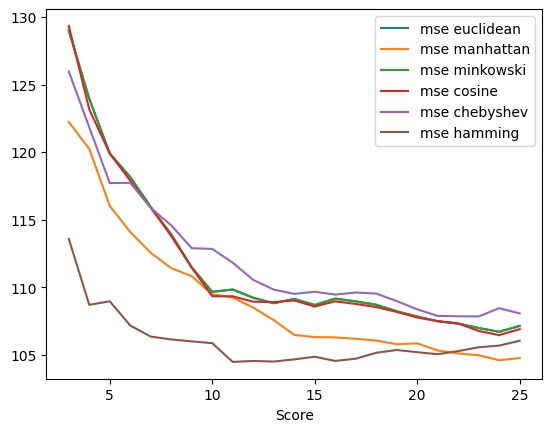

In [59]:
for m in metrics:
  plt.plot(scores['k'], scores['mse_' + m], label='mse ' + m)
  plt.xlabel('K')
  plt.xlabel('Score')
  plt.legend()

In [60]:
knn = KNeighborsRegressor(n_neighbors=11, metric='hamming')

# обучаем
knn.fit(X_train, y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

Генерация ответа

In [ ]:
answer = rf.predict(test)
answer

In [ ]:
with open('out.csv', 'w') as f:
  f.write('index,mean_price\n')

  for i, val in enumerate(answer):
    f.write(f'{i},{val}\n')